In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special

## Definition of a test function

We define a function "func" with a known integral, which we cast as another function "func_integral".

In [44]:
def poly_func(x=None):
    """A test function for integration
    
    Parameters
    ----------
     
    x : np.float32 or np.float64
         position to evaluate function at 
         
    Returns
    -------
    
    f : np.float32 or np.float64
         value of function
    """
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def poly_func_integral(x=None):
    """Integral of test function for integration
    
    Parameters
    ----------
     
    x : np.float32 or np.float64
         upper limit to evaluate integral of function at (lower limit is 0)
         
    Returns
    -------
    
    F : np.float32 or np.float64
         value of integral
    """
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [45]:
def gauss_func(x=None):
    """A test function for integration
    
    Parameters
    ----------
     
    x : np.float32 or np.float64
         position to evaluate function at 
         
    Returns
    -------
    
    f : np.float32 or np.float64
         value of function
    """
    return(np.exp(- x**2))

def gauss_func_integral(x=None):
    """Integral of test function for integration
    
    Parameters
    ----------
     
    x : np.float32 or np.float64
         upper limit to evaluate integral of function at (lower limit is 0)
         
    Returns
    -------
    
    F : np.float32 or np.float64
         value of integral
    """
    return(scipy.special.erf(x) * np.sqrt(np.pi) / 2.)

In [46]:
func = gauss_func
func_integral = gauss_func_integral

In [47]:
num = 1000
x = 6. * (np.arange(num, dtype=np.float32) + 0.5) / np.float32(num)

Text(0, 0.5, 'func')

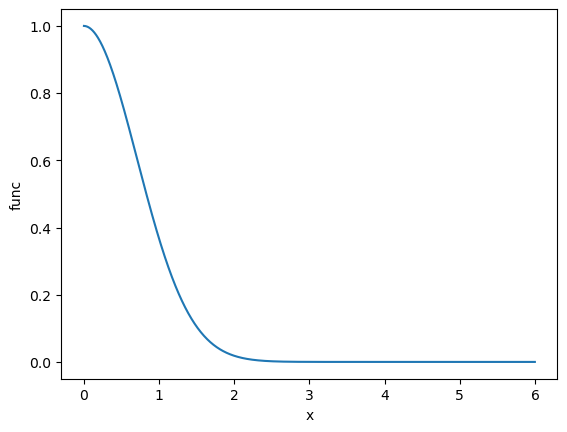

In [48]:
plt.plot(x, func(x))
plt.xlabel('x')
plt.ylabel('func')

Text(0, 0.5, 'func_integral')

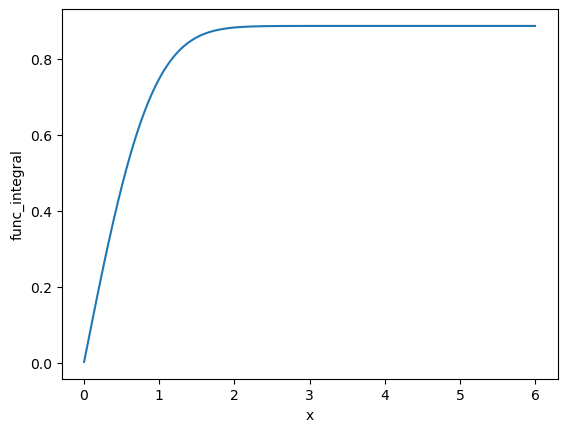

In [49]:
plt.plot(x, func_integral(x))
plt.xlabel('x')
plt.ylabel('func_integral')

## Trapezoid method for integration

We can use the trapezoid method to integrate the function. Basically, this is a weighted some of a bunch of different, equally spaced locations. It is equal to the integration of the linear interpolation of the function between the equally spaced points.

In [50]:
range = np.array([0., 2.], dtype=np.float32) # a, b
num = 1000
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float32)) / np.float32(num - 1.)
dx = (range[1] - range[0]) / np.float32(num - 1.)

In [51]:
traps_weights = np.ones(num, dtype=np.float32)
traps_weights[0] = traps_weights[0] * 0.5
traps_weights[-1] = traps_weights[-1] * 0.5

Except for the end-points, this is just equivalent to adding up the function in steps with spacing dx, weighted by dx.

In [52]:
print(traps_weights)

[0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. 

In [53]:
traps_integral = (func(x) * traps_weights * dx).sum()
print("Trapezoid integral = {i}".format(i=traps_integral))
real_integral = func_integral(range[1]) - func_integral(range[0])
print("Real integral = {r}".format(r=real_integral))
print("Difference = {d}".format(d=traps_integral - real_integral))
print("Fractional difference = {f}".format(f=(traps_integral - real_integral) / real_integral))

Trapezoid integral = 0.8820813298225403
Real integral = 0.8820814103158838
Difference = -8.049334354609528e-08
Fractional difference = -9.125387136009323e-08


In [54]:
np_traps_integral = (np.trapz(func(x), dx=dx))
print((traps_integral - real_integral) / real_integral)

-9.125387136009323e-08


## Simpsons method

If the trapezoid method is the integration of a linear interpolation, Simpson's method is the integration of a quadratic interpolation, where the interpolation done within pairs of intervals, or triplets of points.

In [55]:
num = 101
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float32)) / np.float32(num - 1.)
dx = (range[1] - range[0]) / np.float32(num - 1.)
simps_weights = np.zeros(num, dtype=np.float32)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float32) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float32) + 2. / 3.

In [56]:
print(simps_weights)

[0.33333334 1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667  1.3333334  0.6666667  1.3333334  0.6666667  1.3333334
 0.6666667

In [57]:
simps_integral = (func(x) * simps_weights * dx).sum()
print("Simpsons integral = {i}".format(i=simps_integral))
real_integral = func_integral(range[1]) - func_integral(range[0])
print("Real integral = {r}".format(r=real_integral))
print("Difference = {d}".format(d=simps_integral - real_integral))
print("Fractional difference = {f}".format(f=(simps_integral - real_integral) / real_integral))

Simpsons integral = 0.8820813894271851
Real integral = 0.8820814103158838
Difference = -2.088869877070465e-08
Fractional difference = -2.368114612371681e-08


# Romberg integration

In [58]:
def romberg_integration(func=None, a=None, b=None, tol=1.e-6):
    nx = 2  # Start very coarse!
    nrefine_max = 15 # Don't refine too much
    
    # These will store the weights and the trapezoid estimates
    W = np.zeros(nrefine_max, dtype=np.float32)
    I = np.zeros(nrefine_max, dtype=np.float32)
    
    # Perform the initial trapezoid estimate
    x = a + (b - a) * np.arange(nx, dtype=np.float32) / np.float32(nx - 1)
    dx = (b - a) / np.float32(nx - 1) 
    I[0] = np.trapz(func(x), dx=dx)
    W[0] = 1.
    ncalls = nx
    
    # Now iterate until convergence
    cint = I[0]
    for i in np.arange(1, nrefine_max, dtype=np.int32):
        oint = cint # Squirrel away old integral
        
        # Refine by a factor of two and take a better trapezoid estimate;
        # Note that since we are evaluating the end points, dx is halved
        # by the following formula:
        nx = nx * 2 - 1
        x = a + (b - a) * np.arange(nx, dtype=np.float32) / np.float32(nx - 1)
        dx = (b - a) / np.float32(nx - 1) 
        I[i] = np.trapz(func(x), dx=dx)
        ncalls += nx
        
        # Adjust old weights with factor involving current step size
        for j in np.arange(0, i, dtype=np.int32):
            W[j] *= 1. / (1. - 2.**(2. * (i - j)))

        # Weight to initially apply to the current trapezoid estimate
        W[i] = 1.
        for j in np.arange(0, i, dtype=np.int32):
            W[i] *= 1. / (1. - 2.**(2. * (j - i)))
            
        # Combine the estimates with the weights
        cint = (I[0:i+1] * W[0:i+1]).sum()
        
        # Convergence criterion
        if(np.abs(cint - oint) < tol):
            break
    return(cint, i, W[0:i + 1], ncalls)


In [59]:
romberg_integral, nrefinements, W, ncalls = romberg_integration(func=func, a=range[0], b=range[1])

In [60]:
print("Integral value = {r}".format(r=romberg_integral))
print("Fractional difference = {f}".format(f=(romberg_integral - real_integral) / real_integral))
print("Number of refinements = {n}".format(n=nrefinements))
print("Weights = {W}".format(W=W))
print("Number of function calls = {nc}".format(nc=ncalls))

Integral value = 0.8820813894271851
Fractional difference = -2.368114612371681e-08
Number of refinements = 5
Weights = [-1.3521695e-09  1.8443592e-06 -5.0166569e-04  3.2106604e-02
 -4.8348773e-01  1.4518809e+00]
Number of function calls = 69


## Remapping integration limits

In order to deal with integrations to infinity, or for other reasons, it can be useful to remap integration limits. In this example, we integration $e^{-x}$ from 0 to $\infty$.

In [ ]:
def func(x=None):
    """A test function for integration (in this case exp(-x))
    
    Parameters
    ----------
     
    x : np.float32 or np.float64
         position to evaluate function at 
         
    Returns
    -------
    
    f : np.float32 or np.float64
         value of function
    """
    return (np.exp(- x))

In [ ]:
def func_rescale(xp=None, q=None):
    """Rescaling function for remapping 0..infinity to -1..1
    
    Parameters
    ----------
     
    xp : np.float32 or np.float64
         position to evaluate function at 
         
    q : np.float32 or np.float64
         remapping pivot point
         
    Returns
    -------
    
    f : np.float32 or np.float64
         value of function
    """
    x = q * (1. + xp) / (1. - xp)
    weight = 2. * q / (1. - xp)**2
    return (weight * func(x=x))

In [ ]:
num = 51
range = np.array([-1., 1.], dtype=np.float64)
x = range[0] + (range[1] - range[0]) * (np.arange(num, dtype=np.float64)) / np.float64(num)
dx = (range[1] - range[0]) / np.float64(num)
simps_weights = np.zeros(num, dtype=np.float64)
simps_weights[0] = 1. / 3.
simps_weights[-1] = 1. / 3.
simps_weights[1:-1:2] = np.zeros(num // 2, dtype=np.float64) + 4. / 3.
simps_weights[2:-1:2] = np.zeros(num // 2 - 1, dtype=np.float64) + 2. / 3.

There is a parameter $q$ in the remapping that needs to be set. The integration is most accurate if $q$ is somewhere near where the integral reaches about half its total value.

In [ ]:
q = 1.
simps_integral = (func_rescale(x, q=q) * simps_weights * dx).sum()
print(simps_integral - 1.)

In [ ]:
q = 0.1
simps_integral = (func_rescale(x, q=q) * simps_weights * dx).sum()
print(simps_integral - 1.)

In [ ]:
q = 10.
simps_integral = (func_rescale(x, q=q) * simps_weights * dx).sum()
print(simps_integral - 1.)

## Fixed-order Gaussian quadrature

With only $N$ points, Gaussian quadrature achieves a really high order of integration ($2N-1$). Here we explicitly perform 4th order Gaussian quadrature.

In [ ]:
y1 = np.float64(0.339981043585)
y2 = np.float64(0.861136311594)
w1 = np.float64(0.652145154862)
w2 = np.float64(0.347854845137)
xp = np.array([- y2, - y1, y1, y2], dtype=np.float64)
gauss_weights = np.array([w2, w1, w1, w2], dtype=np.float64)

In [ ]:
def func(x=None):
    """Test function
    
    Parameters
    ----------
    
    x : np.float32 or np.float64
        input parameter
        
    Returns
    -------
    
    f : np.float32 or np.float64
        output of function
"""
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4)

def func_rescale(xp=None, range=None):
    """Rescaled function for new limits of -1 to 1
    
    Parameters
    ----------
    
    xp : np.float32 or np.float64
        input parameter (in new limits' coordinates)
        
    range : list or np.array
        [2] low and high limits of range to map to -1 to 1
        
    Returns
    -------
    
    fn : np.float32 or np.float64
        output of rescaled function
"""
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5.)

In [ ]:
range = np.array([0., 5.], dtype=np.float64)
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)
print((gauss_integral - real_integral) / real_integral)

It will work really well up to 7th order polynomials.

In [ ]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8.)

In [ ]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [ ]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)
print((gauss_integral - real_integral) / real_integral)

For 8th order polynomials and above, it will start to exhibit approximation errors.

In [ ]:
def func(x=None):
    return(- 0.3 + x**2 + 0.05 * x**3 - 0.05 * x**4 + 0.0017 * x**6 - 0.0004 * x**7 + 0.00002 * x**8)

def func_rescale(xp=None, range=None):
    weight = (range[1] - range[0]) * 0.5
    x = range[0] + 0.5 * (range[1] - range[0]) * (xp + 1.)
    return(weight * func(x=x))

def func_integral(x=None):
    return(- 0.3 * x + x**3 / 3. + 0.05 * x**4 / 4. - 0.05 * x**5 / 5. +
           0.0017 * x**7 / 7. - 0.0004 * x**8 / 8. + 0.00002 * x**9 / 9.)

In [ ]:
x = np.arange(1000) / np.float64(999) * (range[1] - range[0]) + range[0]
plt.plot(x, func(x))

In [ ]:
gauss_integral = (func_rescale(xp, range=range) * gauss_weights).sum()
real_integral = func_integral(x=range[1]) - func_integral(x=range[0])
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)
print((gauss_integral - real_integral) / real_integral)

## SciPy Implementation

SciPy has a module for integration using these and other techniques. We can reproduce the above results, and also easily reach to higher order.

In [ ]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=4)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)
print((gauss_integral - real_integral) / real_integral)

In [ ]:
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=5)
print(gauss_integral)
print(real_integral)
print(gauss_integral - real_integral)
print((gauss_integral - real_integral) / real_integral)

Here we return to the exponential, which shows how to remap this to the range [-1, 1] and demonstrates performance of fixed_quad.

In [ ]:
def func(x=None):
    return (np.exp(- x))

def func_rescale(xp=None, a=None):
    x = a * (1. + xp) / (1. - xp)
    weight = 2. * a / (1. - xp)**2
    return (weight * func(x=x))

In [ ]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func_rescale, range[0], range[1], args=(np.float64(1.),), n=5)
print(gauss_integral)
print(gauss_integral - 1.)

In [ ]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func_rescale, range[0], range[1], args=(np.float64(1.),), n=20)
print(gauss_integral)
print(gauss_integral - 1.)

But the method is quite bad if there is a singularity, as in $1/\sqrt{1-x^2}$.

In [ ]:
def func_f(x=None):
    return (1.)

def func(x=None):
    return (func_f(x) * (1. / np.sqrt(1. - x**2)))

In [ ]:
range = np.array([-1., 1.], dtype=np.float64)
(gauss_integral, none) = integrate.fixed_quad(func, range[0], range[1], n=90)
print(gauss_integral)
print(gauss_integral - np.pi)

Gauss-Chebyshev polynomials are the right thing to use for it.

In [ ]:
(x, weight) = np.polynomial.chebyshev.chebgauss(1)
print(x)
print(weight)

In [ ]:
(x, weight) = np.polynomial.chebyshev.chebgauss(10)

In [ ]:
print(x)

In [ ]:
print(weight)

In [ ]:
gausscheb_integral = (func_f(x) * weight).sum()
print(gausscheb_integral)
print(gausscheb_integral - np.pi)

## A physical example: nuclear reaction rates

We express the integrand in terms of $x= E/kT$. The integral can be parametrized by $E_c/kT$, where $E_c$ is a Coulomb energy related to when tunneling becomes possible.

In [ ]:
def r12_f(x=None, eckT=None):
    return(1. * np.exp(- (eckT / x)**0.5))

To test convergence, we use a high order and lower order Gauss-Laguerre set of weights.

In [ ]:
from numpy.polynomial.laguerre import laggauss
(lg_x, lg_weights) = laggauss(100)
(lg_x_50, lg_weights_50) = laggauss(50)

In [ ]:
print((r12_f(x=lg_x, eckT=0.1) * lg_weights).sum())

We will plot the integral as a function of $R= E_c/kT$.

In [ ]:
neckT = 300
lneckT_range = np.log([0.1, 100000.])
lneckT = lneckT_range[0] + (lneckT_range[1] - lneckT_range[0]) * np.arange(neckT) / (np.float64(neckT) - 1.)
eckT = np.exp(lneckT)

In [ ]:
r12 = np.zeros(neckT)
for indx in np.arange(neckT, dtype=np.int32):
    r12[indx] = (r12_f(lg_x, eckT=eckT[indx]) * lg_weights).sum()

In [ ]:
r12_50 = np.zeros(neckT)
for indx in np.arange(neckT, dtype=np.int32):
    r12_50[indx] = (r12_f(lg_x_50, eckT=eckT[indx]) * lg_weights_50).sum()

In [ ]:
plt.plot(np.log10(eckT), np.log10(r12))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ I(R)')

In [ ]:
plt.plot(np.log10(eckT), np.log10(r12_50))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ I(R)')

And we can see how well it is converging, which in this case is reasonably well near the typical value at the center of a star of $R\sim 1000$.

In [ ]:
plt.plot(np.log10(eckT), np.log10(np.abs((r12_50 - r12) / r12)))
plt.xlabel('log$_{10}$ R')
plt.ylabel('log$_{10}$ (I$_{50}$(R) - I$_{100}$(R)) / I$_{100}$(R)')

Now we can plot the actual reaction rate per each type of particle as a function of $kT/E_c$, with the weighting by $\sqrt{E_c/kT}$.

In [ ]:
plt.plot(np.log10(1. / eckT), np.log10(r12 * np.sqrt(eckT)))
plt.xlabel('log$_{10}$ 1 / R')
plt.ylabel('log$_{10}$ $\sqrt{R}$ I(R)')

Zooming in, we can see that in the relevant range it is a very steep function of temperature. This is what makes the core of stars very stable; a very slight increase in temperature (due to a slight compression of the gas) will generate more energy and push the star back to its previous density.

In [ ]:
plt.plot(np.log10(1. / eckT), np.log10(r12 * np.sqrt(eckT)))
plt.xlim((-3.5, -2.5))
plt.ylim((-10, -3.))
plt.xlabel('log$_{10}$ 1 / R')
plt.ylabel('log$_{10}$ $\sqrt{R}$ I(R)')

## Monte Carlo methods

Mean value integration is the simplest practical Monte Carlo method. These methods in general are not cost-effective in low numbers of dimensions, but are so for higher dimensional integrals.

In [ ]:
def func_1d_gauss(x=None, sigma=1., mean=0.):
    return(np.exp(- 0.5 * (x - mean)**2 / sigma**2) / np.sqrt(2. * np.pi) / sigma)

In [ ]:
num = 100000000
real_integral = 1.
prange = [- 5., 5.]
xrandom = prange[0] + (prange[1] - prange[0]) * np.random.random(size=num)
mc_integral = (prange[1] - prange[0]) * func_1d_gauss(xrandom).sum() / np.float64(num) 
print(real_integral)
print(mc_integral)
print(real_integral - mc_integral)

In [ ]:
def func_6d_gauss(x=None, sigma=np.ones(6), mean=np.zeros(6)):
    ndim = 6
    xp = np.zeros(x.shape[1])
    for indx in np.arange(ndim):
        xp = xp + ((x[indx, :] - mean[indx]) / sigma[indx])**2
    denom = 1.
    for indx in np.arange(ndim):
        denom = denom * sigma[indx]
    return(np.exp(- 0.5 * xp) / np.sqrt(2. * np.pi)**ndim / denom)

In [ ]:
num = 10000000
real_integral = 1.
prange = [- 5., 5.]
xrandom = prange[0] + (prange[1] - prange[0]) * np.random.random(size=(6, num))
mc_integral = (prange[1] - prange[0])**6 * func_6d_gauss(x=xrandom).sum() / np.float64(num) 
print(real_integral)
print(mc_integral)
print(real_integral - mc_integral)